## Introduction
Delfi Kusuma Wardhani

H8 FTDS - 002

## Dataset Description

The dataset can be downloaded here : https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma

1. ID : unique identifier for each column
2. timestamp : unix timestamp
3. hour : hour of the day
4. day : day of the week
5. month : month in a year
6. datetime : date value
7. timezone : timezone
8. source : initial source of the code
9. destination : destination of the ride
10. cab_type : the type of cab
11. product_id : id of product type
12. name : name of the product
13. price : transaction price
14. distance : the distance of the destination
15. surge_multiplier : surge multiplier for trips that originate in certain parts of the city
16. latitude : latitude of the pickup place
17. longitude : longitude of the pickup place
18. temperature : temperature
19. apparentTemperature
20. short_summary : weather summary (short version)
21. long_summary : weather summary (long version)
22. precipIntensity : rainfall
23. precipProbability : rainfall probability
24. humidity : humidity
25. windSpeed : speed of wind
26. windGust : a sudden, brief increase in speed of the wind                     
27. windGustTime                 
28. visibility : visibility for driving or to be outside building                 
29. temperatureHigh : highest temperature           
30. temperatureHighTime : the time when highest temperature occured       
31. temperatureLow : lowest temperature             
32. temperatureLowTime : the time when lowest temperature occured        
33. apparentTemperatureHigh : highest temperature      
34. apparentTemperatureHighTime : the time when highest temperature occured  
35. apparentTemperatureLow : lowest temperature     
36. apparentTemperatureLowTime : the time when lowest temperature occured   
37. icon                         
38. dewPoint : from humidity                    
39. pressure : pressure (from the wind)                    
40. windBearing                 
41. cloudCover : cloudy                  
42. uvIndex : index uv                      
43. visibility : visibility for driving or to be outside building            
44. ozone : ozone intensity                       
45. sunriseTime : time of sunrise on that day              
46. sunsetTime : time of sunset on that day              
47. moonPhase : phase of moon               
48. precipIntensityMax : like rainfall      
49. uvIndexTime : time when index uv measured          
50. temperatureMin : lowest temperature           
51. temperatureMinTime : the time when lowest temperature occured    
52. temperatureMax : highest temperature          
53. temperatureMaxTime : the time when highest temperature occured         
54. apparentTemperatureMin : lowest temperature   
55. apparentTemperatureMinTime : the time when lowest temperature occured  
56. apparentTemperatureMax : highest temperature   
57. apparentTemperatureMaxTime : the time when highest temperature occured  

## Objective
Using the concept of regression to be implemented in the dataset to predict the taxi fare, considering the right features that have possible correlation with, and train them with some models and evaluate them.

## Import Library

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Data Loading

In [2]:
# Data Loading and setting datetime as its index
df = pd.read_csv('rideshare_kaggle.csv', index_col='datetime', parse_dates=True)
df

,id,timestamp,hour,day,month,timezone,source,destination,cab_type,product_id,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
datetime,,,,,,,,,,,,,,,,,,,,,
2018-12-16 09:30:07,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
2018-11-27 02:00:23,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2018-11-28 01:00:22,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
2018-11-30 04:53:02,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
2018-11-29 03:49:20,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-01 23:53:05,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
2018-12-01 23:53:05,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
2018-12-01 23:53:05,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Collecting info from each columns

In [3]:
# Show data info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 693071 entries, 2018-12-16 09:30:07 to 2018-12-01 23:53:05
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   timezone                     693071 non-null  object 
 6   source                       693071 non-null  object 
 7   destination                  693071 non-null  object 
 8   cab_type                     693071 non-null  object 
 9   product_id                   693071 non-null  object 
 10  name                         693071 non-null  object 
 11  price                        637976 non-null  float64
 12  distance                

In [10]:
df.shape

(693071, 56)

## Data Cleaning

#### Drop some columns
Droping some columns from the table, considering that most of them has the similar values with other columns. For example the _apparentTemperature_ has the same values with _temperature_. Hence, we drop the _apparentTemperature_, and so on. There are also some columns which have uncountable values, such as _timestamp_, _windGustTime_, etc.

In [11]:
# Drop some columns
erase = ['id', 'timestamp', 'timezone', 
        'long_summary', 'apparentTemperature', 'windGustTime', 
        'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHighTime', 
        'apparentTemperatureLowTime', 'uvIndexTime', 'latitude', 'longitude',
        'apparentTemperatureHigh', 'apparentTemperatureLow', 'visibility.1',
        'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime',
        'temperatureHigh', 'temperatureLow', 'icon', 'precipProbability',
        'apparentTemperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMax',
        'temperatureMin','temperatureMax', 'precipIntensity'
        ]
df.drop(erase, inplace=True, axis=1)

#### Replace some values
Now let's take a look a little bit from the data, there are some peculiar values in the _product_id_ column.

In [12]:
df.tail(10)

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,...,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax
datetime,,,,,,,,,,,,,,,,,,,,,
2018-12-02 05:28:04,5,2,12,Theatre District,Haymarket Square,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,15.0,1.61,...,33.58,1021.39,136,1.00,0,269.8,1543751798,1543785242,0.86,0.0916
2018-12-02 05:28:04,5,2,12,Theatre District,Haymarket Square,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,15.0,1.61,...,33.58,1021.39,136,1.00,0,269.8,1543751798,1543785242,0.86,0.0916
2018-12-02 05:28:04,5,2,12,Theatre District,Haymarket Square,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.61,...,33.58,1021.39,136,1.00,0,269.8,1543751798,1543785242,0.86,0.0916
2018-12-02 05:28:04,5,2,12,West End,North End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,17.0,1.00,...,33.58,1021.39,136,1.00,0,269.8,1543751798,1543785242,0.86,0.0916
2018-12-01 23:53:05,23,1,12,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,...,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000
2018-12-01 23:53:05,23,1,12,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,...,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000
2018-12-01 23:53:05,23,1,12,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,...,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000
2018-12-01 23:53:05,23,1,12,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.00,...,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000
2018-12-01 23:53:05,23,1,12,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,...,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000


In [13]:
# Seeing clearly the value inside of the column
df['product_id'].unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2',
       '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'], dtype=object)

So there is a miss-typing or encrypting the _product_id_ so it become such unique codes. But, we'll use this feature later, so instead of droping the column, we will just replace them with the proper id, looking at its name.

In [14]:
df.replace(['6f72dfc5-27f1-42e8-84db-ccc7a75f6969', '6c84fd89-3f11-4782-9b50-97c468b19529', 
            '55c66225-fbe7-4fd5-9072-eab1ece5e23e', '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
            '6d318bcc-22a3-4af6-bddd-b409bfce1546', '997acbb5-e102-41e1-b155-9df7de0a73f2',
            '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'], 
           ['uber_xl','uber_black','uber_x', 'uber_wav', 'uber_black_suv', 'uber_pool','uber_taxi'], inplace=True)

df.tail(10)

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,...,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax
datetime,,,,,,,,,,,,,,,,,,,,,
2018-12-02 05:28:04,5,2,12,Theatre District,Haymarket Square,Uber,uber_x,UberX,15.0,1.61,...,33.58,1021.39,136,1.00,0,269.8,1543751798,1543785242,0.86,0.0916
2018-12-02 05:28:04,5,2,12,Theatre District,Haymarket Square,Uber,uber_wav,WAV,15.0,1.61,...,33.58,1021.39,136,1.00,0,269.8,1543751798,1543785242,0.86,0.0916
2018-12-02 05:28:04,5,2,12,Theatre District,Haymarket Square,Uber,uber_black_suv,Black SUV,27.0,1.61,...,33.58,1021.39,136,1.00,0,269.8,1543751798,1543785242,0.86,0.0916
2018-12-02 05:28:04,5,2,12,West End,North End,Uber,uber_black,Black,17.0,1.00,...,33.58,1021.39,136,1.00,0,269.8,1543751798,1543785242,0.86,0.0916
2018-12-01 23:53:05,23,1,12,West End,North End,Uber,uber_wav,WAV,9.5,1.00,...,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000
2018-12-01 23:53:05,23,1,12,West End,North End,Uber,uber_xl,UberXL,13.0,1.00,...,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000
2018-12-01 23:53:05,23,1,12,West End,North End,Uber,uber_x,UberX,9.5,1.00,...,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000
2018-12-01 23:53:05,23,1,12,West End,North End,Uber,uber_taxi,Taxi,NaN,1.00,...,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000
2018-12-01 23:53:05,23,1,12,West End,North End,Uber,uber_black_suv,Black SUV,27.0,1.00,...,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000


Now since we're no longer using the values from _name_, we can drop this column.

In [15]:
df.drop(['name'], inplace=True, axis=1) 

#### Handling Missing Values

In [16]:
# Sum up the null values
df.isnull().sum()

hour                      0
day                       0
month                     0
source                    0
destination               0
cab_type                  0
product_id                0
price                 55095
distance                  0
surge_multiplier          0
temperature               0
short_summary             0
humidity                  0
windSpeed                 0
windGust                  0
visibility                0
dewPoint                  0
pressure                  0
windBearing               0
cloudCover                0
uvIndex                   0
ozone                     0
sunriseTime               0
sunsetTime                0
moonPhase                 0
precipIntensityMax        0
dtype: int64

There are 55095 cells in _price_ column have no values. Since its the main column that we'd like to analyze, having null or even zero values will affect the analysis result. So we will drop out the whole row where there are the null values.

In [17]:
# Drop rows with null values
df.dropna(axis=0, how='any', inplace=True)

In [18]:
# Confirming and checking again the total null values
df.isnull().sum()

hour                  0
day                   0
month                 0
source                0
destination           0
cab_type              0
product_id            0
price                 0
distance              0
surge_multiplier      0
temperature           0
short_summary         0
humidity              0
windSpeed             0
windGust              0
visibility            0
dewPoint              0
pressure              0
windBearing           0
cloudCover            0
uvIndex               0
ozone                 0
sunriseTime           0
sunsetTime            0
moonPhase             0
precipIntensityMax    0
dtype: int64

In [19]:
df.shape

(637976, 26)

#### Adding column
Now we'd like to add a column into the dataset:
- 'daylight_hrs' : the month recorded in dataset are November and December, so it's winter season and there's not much daylight hours. It is possible if there are only a few cab driver intend to drive in the night, and it might affect on the price.

In [20]:
# Add 'daylight_hrs' column
df['daylight_hrs'] = df['sunsetTime'] - df['sunriseTime']
df['daylight_hrs'] = df['daylight_hrs']/3600
df['daylight_hrs']

datetime
2018-12-16 09:30:07    9.105556
2018-11-27 02:00:23    9.450833
2018-11-28 01:00:22    9.424167
2018-11-30 04:53:02    9.373333
2018-11-29 03:49:20    9.398333
                         ...   
2018-12-01 23:53:05    9.312222
2018-12-01 23:53:05    9.312222
2018-12-01 23:53:05    9.312222
2018-12-01 23:53:05    9.312222
2018-12-01 23:53:05    9.312222
Name: daylight_hrs, Length: 637976, dtype: float64

Calculated the daylight hours by subtracting the _sunsetTime_ with _sunriseTime_. Now that we won't need these two values anymore, we drop them out from the dataset.

In [21]:
# Drop 2 more columns
df.drop(['sunriseTime','sunsetTime'], inplace=True, axis=1) 

#### Checking on outliers
First, we plot the 'price' data into histogram graphic and boxplot so we could see the distribution of the data

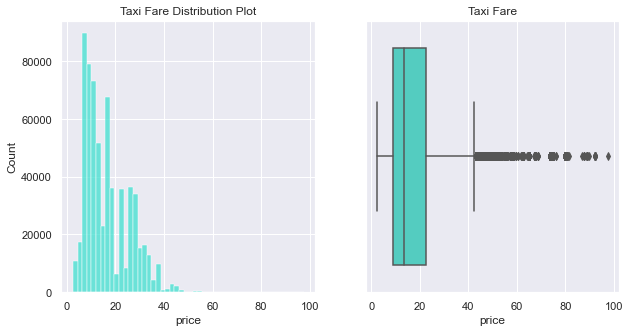

In [22]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Taxi Fare Distribution Plot')
sns.histplot(df.price, bins=50, color="turquoise")

plt.subplot(1,2,2)
plt.title('Taxi Fare')
sns.boxplot(x=df.price, color="turquoise")

plt.show()

Looking at the boxplot graph, we can see there are some outliers around above the 43. Now we're using Tukey's rule to set the exact upper and lower bound to detect the outliers.

In [23]:
# Tukey's rule
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

# min threshold
lower = q1 - 1.5*iqr

# max threshold
upper = q3 + 1.5*iqr

print(lower, upper)

-11.25 42.75


Let's see and count how many outliers below the minimum threshold and above the maximum threshold.

In [24]:
df[df['price'] < lower].count()

hour                  0
day                   0
month                 0
source                0
destination           0
cab_type              0
product_id            0
price                 0
distance              0
surge_multiplier      0
temperature           0
short_summary         0
humidity              0
windSpeed             0
windGust              0
visibility            0
dewPoint              0
pressure              0
windBearing           0
cloudCover            0
uvIndex               0
ozone                 0
moonPhase             0
precipIntensityMax    0
daylight_hrs          0
dtype: int64

In [25]:
outlier = df[df['price'] > upper]
outlier

,hour,day,month,source,destination,cab_type,product_id,price,distance,surge_multiplier,...,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,daylight_hrs
datetime,,,,,,,,,,,,,,,,,,,,,
2018-11-28 10:41:07,10,28,11,South Station,Back Bay,Lyft,lyft_lux,52.5,3.25,2.00,...,9.899,28.39,991.05,259,0.48,0,344.7,0.72,0.0000,9.383333
2018-12-16 02:35:15,2,16,12,South Station,Back Bay,Lyft,lyft_luxsuv,67.5,3.25,2.00,...,9.827,32.00,1024.46,36,0.14,0,296.6,0.27,0.0082,9.097500
2018-12-14 17:20:04,17,14,12,Theatre District,Boston University,Lyft,lyft_luxsuv,45.5,4.76,1.00,...,9.962,29.03,1030.83,167,0.16,1,289.1,0.24,0.0000,9.105278
2018-12-02 17:03:02,17,2,12,Theatre District,Fenway,Lyft,lyft_luxsuv,45.5,4.31,1.00,...,2.030,45.59,1008.80,120,1.00,1,280.3,0.86,0.0916,9.290000
2018-12-16 16:10:07,16,16,12,Financial District,Boston University,Lyft,lyft_luxsuv,45.5,5.33,1.00,...,9.608,35.13,1018.69,76,1.00,1,326.7,0.30,0.1246,9.088611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-17 20:20:04,20,17,12,Financial District,Boston University,Uber,uber_black_suv,47.0,5.56,1.00,...,9.808,31.96,999.80,286,0.77,0,350.3,0.33,0.0184,9.083889
2018-12-14 10:00:11,10,14,12,Financial District,Fenway,Lyft,lyft_luxsuv,52.5,4.58,1.25,...,9.641,22.07,1033.84,148,0.14,0,294.7,0.24,0.0000,9.105278
2018-12-03 05:48:05,5,3,12,Financial District,Boston University,Lyft,lyft_luxsuv,47.5,5.42,1.00,...,1.460,44.22,1001.35,276,1.00,0,289.6,0.89,0.0004,9.270000


If we take a look at the table of outliers above, we can see the price above 42,75 are owned by the data that also has the luxury type of cab. There are 5589 values of them. Since this still kind of make sense, we decided **not to consider these values as outliers.** So, we'll keep them.

## Exploratory Data Analysis
In this part, we will analyze all the variables to be selected for the features. We'll find the correlation from all variables with the predicted target data, which is _price_. The variables that has strong correlation with _price_ will be put in a new dataframe of selected features to be trained with the model. Each types of data variable will be taken care of differently. First, let's take a look again the information of dataset.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 637976 entries, 2018-12-16 09:30:07 to 2018-12-01 23:53:05
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                637976 non-null  int64  
 1   day                 637976 non-null  int64  
 2   month               637976 non-null  int64  
 3   source              637976 non-null  object 
 4   destination         637976 non-null  object 
 5   cab_type            637976 non-null  object 
 6   product_id          637976 non-null  object 
 7   price               637976 non-null  float64
 8   distance            637976 non-null  float64
 9   surge_multiplier    637976 non-null  float64
 10  temperature         637976 non-null  float64
 11  short_summary       637976 non-null  object 
 12  humidity            637976 non-null  float64
 13  windSpeed           637976 non-null  float64
 14  windGust            637976 non-null  float64
 15  

### Analysing the Features
There are three distinct types of features: 
- **quantitative/numerical**, it can take any real numeric value and hence it is known as a numerical feature.
- **categorical**, a categorical variable is one that has two or more categories and each value in that feature can be categorised by them
- **ordinal**, similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable.


We can also consider a fourth type of feature—the Boolean—as this type does have a few distinct qualities, although it is actually a type of categorical feature. These feature types can be ordered in terms of how much information they convey. Quantitative features have the highest information capacity followed by ordinal, categorical, and Boolean.

#### Quantitative/Numerical Features
Based on the dataset info above, we have 20 variables of numeric. I divide these into 2 parts. The first one are price, hour, day, month, distance, and surge_multiplier. Let's see the correlation between these features with _price_

<AxesSubplot:>

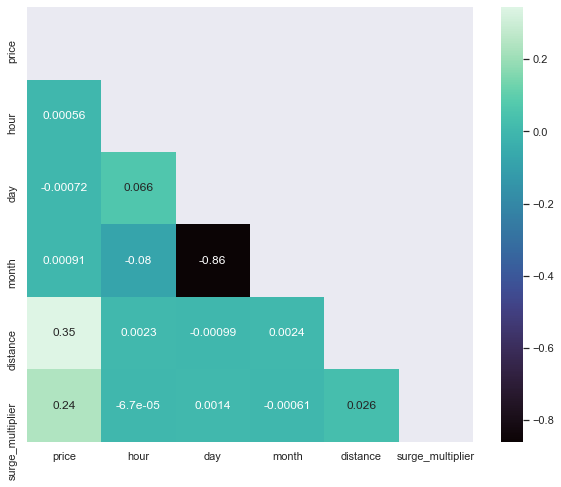

In [27]:
df1 = df[['price', 'hour', 'day', 'month',
          'distance', 'surge_multiplier'
         ]]

#plotting heatmap with correlation on new df1 dataframe
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),cmap="mako", annot=True, mask=np.triu(df1.corr()))

The heatmap correlation graph shows that only surge_multiplier and distance that have significant correlation with price. Now, for the next correlation measurements, we want to include these two features to be compared with others.

Next, we have the second part of numerical features. All numerical features related to the weather condition (such as temperature, humidity, windSpeed, uvIndex, etc) are in this part.

<AxesSubplot:>

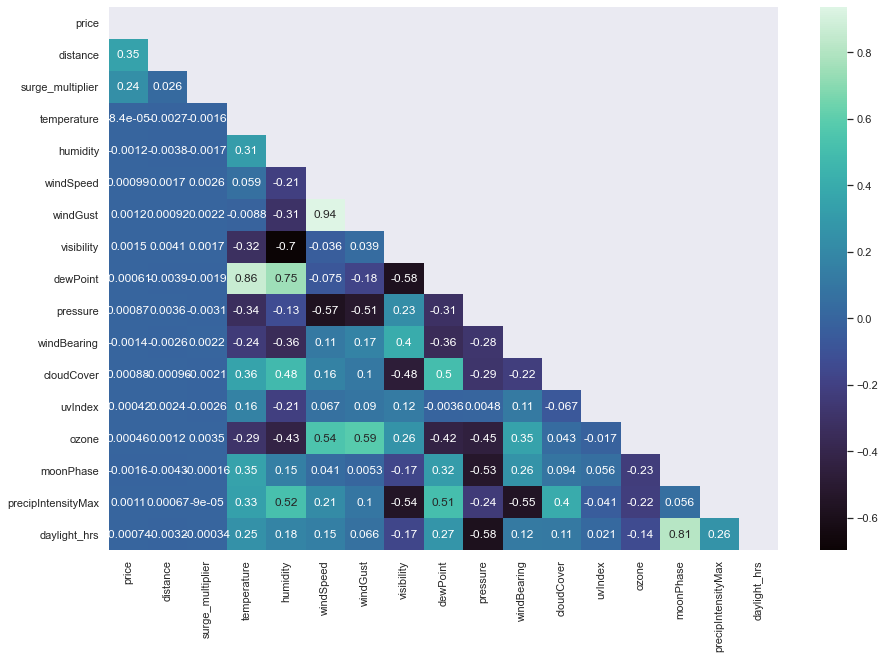

In [28]:
num_weather_col = df[['price', 'distance','surge_multiplier','temperature',
                     'humidity','windSpeed', 'windGust', 'visibility',
                     'dewPoint', 'pressure', 'windBearing', 'cloudCover',
                     'uvIndex','ozone', 'moonPhase','precipIntensityMax', 
                     'daylight_hrs'
                    ]]

#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(15,10))
sns.heatmap(num_weather_col.corr(),annot=True, cmap="mako",mask=np.triu(num_weather_col.corr()))

The above heatmap correlation graph shows there is no significant correlation between price and the other features related to weather condition, the same with distance and surge_multiplier. The biggest correlation in these weather features only formed with other weather features. For example, the temperature and humidity have strong correlation with dewPoint, moonPhase has strong correlation with daylight hours, and so on. So, **the weather condition has no effect on the price**, it affects the willingness of the drivers in taking orders though, but not the price. Therefore, we would not select any features from these values, and let's see about the categorical features.

#### Categorical Features
From the dataset, we have some categorical features:
- cab_type
- product_id
- source
- destination
- short_summary

Next, we will see the correlation between those features and price. There is no specific calculation in measuring the correlation here, instead we could just see the visualization. If there's significant difference between the values with the price it means that there's also significant correlation between them. 

For more explanation, let's just start to see the visualizations.

##### Cab Type

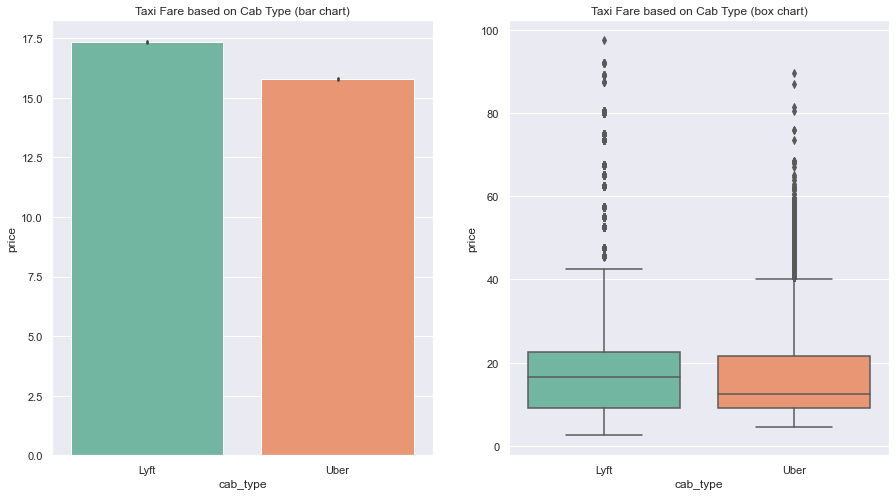

In [29]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Taxi Fare based on Cab Type (bar chart)')
sns.barplot(x="cab_type", y="price", data=df, palette='Set2')

plt.subplot(1,2,2)
plt.title('Taxi Fare based on Cab Type (box chart)')
sns.boxplot(x="cab_type", y="price", data=df, palette="Set2" )

plt.show()

The above graphs show there is a little gap between taxi fare for Uber and Lyft (cab type). This means there's a little/weak correlation too between price and cab type. Now, move on to the next feature, which is product_id.

##### Product ID

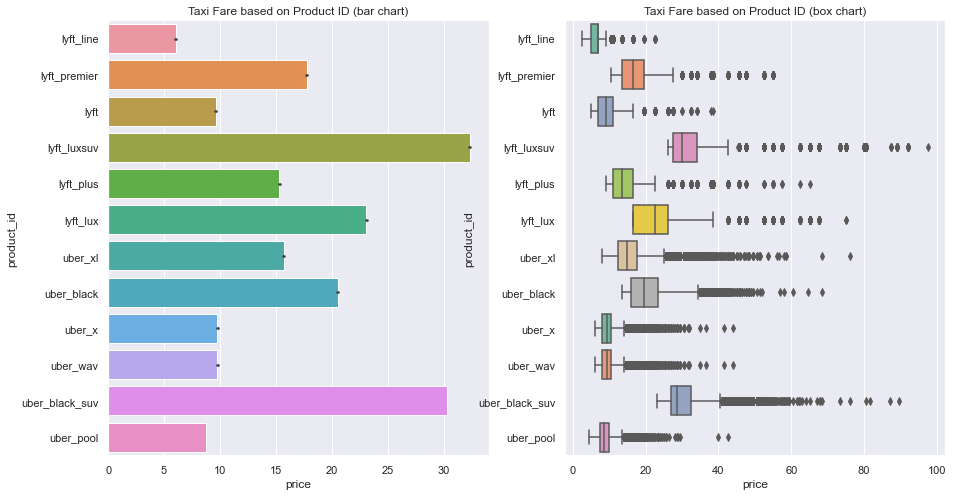

In [30]:
df_name = df.groupby('product_id')[['price']].mean().reset_index()
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Taxi Fare based on Product ID (bar chart)')
sns.barplot(x="price", y="product_id", data=df)

plt.subplot(1,2,2)
plt.title('Taxi Fare based on Product ID (box chart)')
sns.boxplot(x="price", y="product_id", data=df, palette="Set2" )

plt.show()

The charts above show that there are big gap/differences between each values. It means different product will have a different price too. So, **there is a strong correlation between product_id and price**.

##### Destination
For a certain area, the cab company usually has set their pricing policy. For example, for quiet area there will be added the surging price because the driver should go further from the common or crowded area. Hence, there is possible correlation between price and destination(and/or pickup point).

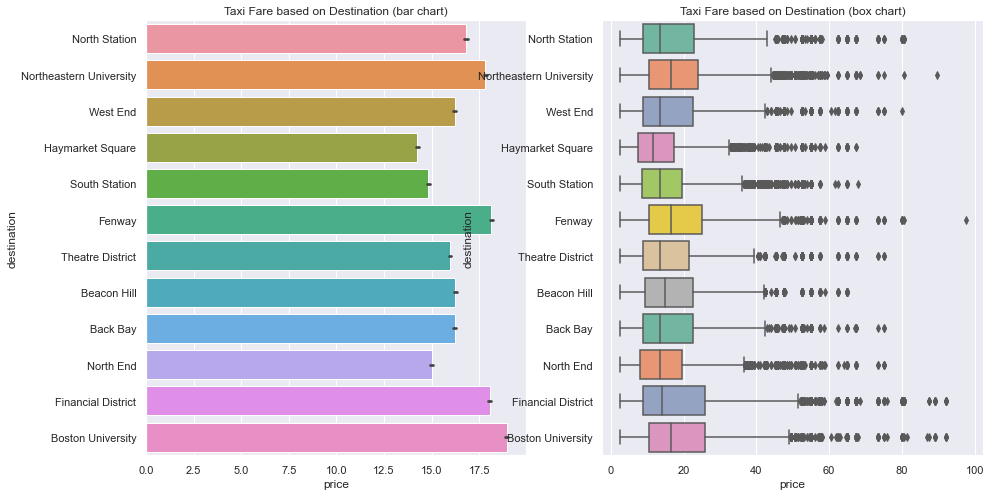

In [31]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Taxi Fare based on Destination (bar chart)')
sns.barplot(x="price", y="destination", data=df)

plt.subplot(1,2,2)
plt.title('Taxi Fare based on Destination (box chart)')
sns.boxplot(x="price", y="destination", data=df, palette="Set2" )

plt.show()

The charts above show there are some differences between each type of destination regarding their price. So there is a correlation between destination and price.

##### Source / Pickup point

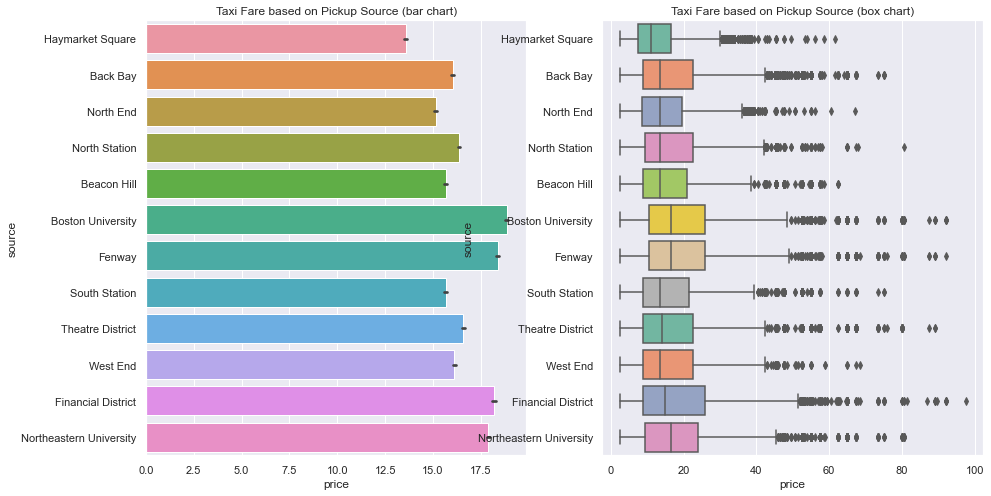

In [32]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Taxi Fare based on Pickup Source (bar chart)')
sns.barplot(x="price", y="source", data=df)

plt.subplot(1,2,2)
plt.title('Taxi Fare based on Pickup Source (box chart)')
sns.boxplot(x="price", y="source", data=df, palette="Set2" )

plt.show()

The charts above show there are some differences between each type of source regarding their price. So there is a correlation between source and price.

##### Short Summary ( Weather Condition )
This feature represents the summary of whole weather condition that mentioned before in numerical features. There is possibility that this categorical feature would also has no correlation with price. Let's see the visualization.

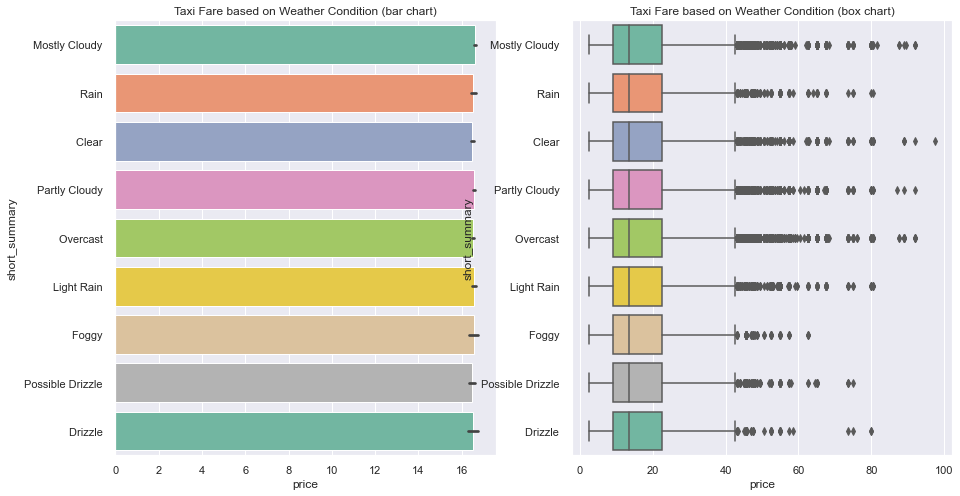

In [33]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Taxi Fare based on Weather Condition (bar chart)')
sns.barplot(x="price", y="short_summary", data=df, palette='Set2')

plt.subplot(1,2,2)
plt.title('Taxi Fare based on Weather Condition (box chart)')
sns.boxplot(x="price", y="short_summary", data=df, palette="Set2" )

plt.show()

As expected before, the charts above show that there is no difference from each type of summary regarding the price. So, there is no correlation between summary and price.

## Data Preprocessing

#### Feature Selection
After analyzing all the features, there are some features that I'd like to choose to be included in model training:
- product_id (uber_black, uber_pool, uber_xl, etc.)
- distance
- surge_multiplier
These are the features that have the most significant correlation with our target (price) among the others. Since our objective is to predicting data, the correlation between the target and its features is important.

#### Encode
These features then will be set in one new dataframe. Specifically for product_id feature, because it's a categorical feature, we will do the one-hot-encoding so it will become numerical.

In [34]:
# Encoding the product_id feature
z = pd.get_dummies(df['product_id'])
z['distance']=df['distance']
z['surge']=df['surge_multiplier']
z['price']=df['price']
z

,lyft,lyft_line,lyft_lux,lyft_luxsuv,lyft_plus,lyft_premier,uber_black,uber_black_suv,uber_pool,uber_wav,uber_x,uber_xl,distance,surge,price
datetime,,,,,,,,,,,,,,,
2018-12-16 09:30:07,0,1,0,0,0,0,0,0,0,0,0,0,0.44,1.0,5.0
2018-11-27 02:00:23,0,0,0,0,0,1,0,0,0,0,0,0,0.44,1.0,11.0
2018-11-28 01:00:22,1,0,0,0,0,0,0,0,0,0,0,0,0.44,1.0,7.0
2018-11-30 04:53:02,0,0,0,1,0,0,0,0,0,0,0,0,0.44,1.0,26.0
2018-11-29 03:49:20,0,0,0,0,1,0,0,0,0,0,0,0,0.44,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-01 23:53:05,0,0,0,0,0,0,0,0,0,1,0,0,1.00,1.0,9.5
2018-12-01 23:53:05,0,0,0,0,0,0,0,0,0,0,0,1,1.00,1.0,13.0
2018-12-01 23:53:05,0,0,0,0,0,0,0,0,0,0,1,0,1.00,1.0,9.5


#### Resampling

The datetime values in the dataset are recorded/showed as the exact time with the seconds. To make the index of dataframe become sorted orderly, we do resampling the dataframe and the index will be grouped in minutes order.

In [35]:
d = z.resample('t').sum()
d

,lyft,lyft_line,lyft_lux,lyft_luxsuv,lyft_plus,lyft_premier,uber_black,uber_black_suv,uber_pool,uber_wav,uber_x,uber_xl,distance,surge,price
datetime,,,,,,,,,,,,,,,
2018-11-26 03:40:00,9,5,5,7,7,10,4,7,4,4,6,9,193.57,79.5,1439.5
2018-11-26 03:41:00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0
2018-11-26 03:42:00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0
2018-11-26 03:43:00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0
2018-11-26 03:44:00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-18 19:11:00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0
2018-12-18 19:12:00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0
2018-12-18 19:13:00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0


Now, after the dataframe is set, we split this data into two, the data train and data set.

#### Split Data
In this project, we will split the data into 2, the 30% for testing and 70% for training.

In [36]:
y = d['price'].values
X = d.drop(columns=['price'],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Data Scaling
Next, we will do the data scaling to both the data train and data test

In [37]:
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## Model Definition
Regression model in machine learning is used for predicting the continuous data. One simple and common model that usually used in this model is linear regression. Linear regression is the next step up after correlation. It is used when we want to predict the value of a variable based on the value of another variable. 

In this project, we use the linear regression model to predict the taxi fare by studying the given dataset of destination histories.


## Model Training
After we split and scale the data, we train them with the model. From this training process, we will get the result which are the intercept and coefficient value. A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *coefficient*, and $b$ is commonly known as the *intercept*.

In [38]:
# Model fitting and training with linear regression model
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

# The training output (intercept and coefficient)
print('intercept  : ', lin_reg.intercept_)
print('--------------------------------------------------------------------------------')
print('coefficient: ', lin_reg.coef_)

intercept  :  318.37231176908614
--------------------------------------------------------------------------------
coefficient:  [-63.58649774 -71.93253651 -10.67359832  23.56247226 -40.60232322
 -30.87663408 -19.5111195   20.64469221 -66.76755269 -64.10390983
 -63.63230849 -38.90283812 280.62780431 883.86911517]


## Model Evaluation

We use the data test set to evaluate the model.

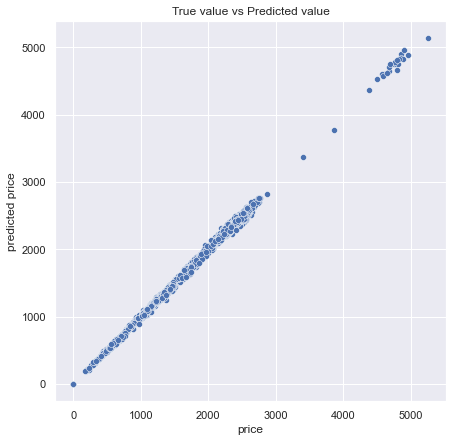

In [42]:
pred = lin_reg.predict(X_test)

plt.figure(figsize=(7,7))
plt.title('True value vs Predicted value')
sns.scatterplot(x=y_test, y=pred)
plt.xlabel('price')
plt.ylabel('predicted price')
plt.show()

In [44]:
diff = pd.DataFrame({'True Values':y_test,
                     'Prediction' :pred,
                     'Error Values': (y_test - pred)
                    })
diff

,True Values,Prediction,Error Values
0,0.0,0.063321,-0.063321
1,0.0,0.063321,-0.063321
2,0.0,0.063321,-0.063321
3,0.0,0.063321,-0.063321
4,0.0,0.063321,-0.063321
...,...,...,...
9780,0.0,0.063321,-0.063321
9781,0.0,0.063321,-0.063321
9782,2340.5,2335.790141,4.709859
9783,0.0,0.063321,-0.063321


From the preview table of Error Values above, we can see most of the predictions are not exactly the same with the true values, they have slightly difference. Now, let's calculate the metrics.

In [45]:
# Function for showing the result
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('-------------------------------')

# Function to calculate the evaluation
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    return mae, mse, rmse

In [46]:
# Assign variable for the output
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)
accu = lin_reg.score(X_test, y_test)

# Show the evaluation output
print('-------------------------------')
print('Train set evaluation:\n-------------------------------')
print_evaluate(y_train, train_pred)
print('Test set evaluation:\n-------------------------------')
print_evaluate(y_test, test_pred)
print('Accuracy model: ', accu)

-------------------------------
Train set evaluation:
-------------------------------
MAE: 4.478875443271401
MSE: 185.62110475476933
RMSE: 13.624283641893593
-------------------------------
Test set evaluation:
-------------------------------
MAE: 4.694618312082865
MSE: 199.28302514268944
RMSE: 14.116763975596157
-------------------------------
Accuracy model:  0.999666113341016


The RMSE result value seem like to be satisfying, because we want this value to be as small as possible. 

## Model Inference
Now, let's try to create a new dataset that has the same amount of features with the dataset before. This new dataset will be tested later with the trained model. This time, we could just get some random number to be inserted to the dataframe.

In [47]:
dummy = pd.DataFrame(np.random.randint(0,2000,size=(1000, 15)), columns=list('ABCDEFGHIJKLMNZ'))
dummy

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Z
0,1614,152,14,986,1391,694,699,1781,1815,1956,1902,1008,1532,247,1331
1,1126,518,93,1222,4,817,557,881,890,1633,1345,1297,1939,1918,686
2,236,1109,1525,621,99,922,241,875,1742,752,1393,1044,1177,623,1788
3,531,1195,1269,1534,585,333,342,1258,1133,398,1619,1181,621,1118,1783
4,1372,1582,417,514,1480,1178,1723,1664,436,636,671,177,1065,1177,1416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,91,1958,644,1703,1241,1618,692,949,967,475,1955,131,1264,246,1426
996,64,114,3,978,1397,1154,1236,1717,350,863,873,880,777,1453,337
997,545,1470,583,541,1048,1541,1156,1824,218,984,1645,1488,1062,741,1957
998,1904,1494,1745,419,569,678,134,17,465,1897,1602,692,96,830,1271


Then we proceed the data, scale the data, then do the testing

In [48]:
# Assign x and y value from dummy data
y_dum = dummy['Z'].values # Z = target column
X_dum = dummy.drop(columns=['Z'],axis=1).values

In [49]:
# Data Scaling
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_dum = pipeline.fit_transform(X_dum)

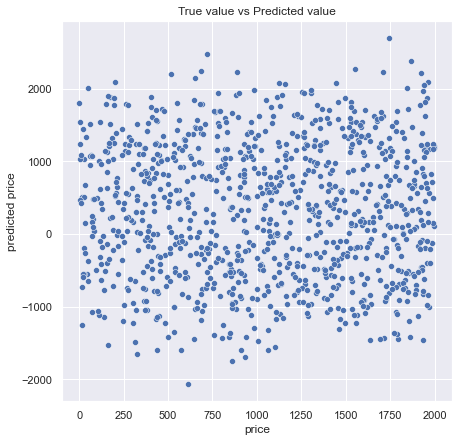

In [53]:
# Testing with dummy data
pred_dum = lin_reg.predict(X_dum)

plt.figure(figsize=(7,7))
plt.title('True value vs Predicted value')
sns.scatterplot(x=y_dum, y=pred_dum)
plt.xlabel('price')
plt.ylabel('predicted price')
plt.show()

In [54]:
# Creating dataframe of the prediction result of testing dummy data
diff_dum = pd.DataFrame({'True Values':y_dum,
                     'Prediction' :pred_dum,
                     'Error Values': (y_dum - pred_dum)
                    })
diff_dum

,True Values,Prediction,Error Values
0,1331,-815.778321,2146.778321
1,686,2237.695648,-1551.695648
2,1788,-151.460265,1939.460265
3,1783,427.905401,1355.094599
4,1416,652.470769,763.529231
...,...,...,...
995,1426,-731.388181,2157.388181
996,337,1236.155049,-899.155049
997,1957,-91.577315,2048.577315
998,1271,-631.104616,1902.104616


The differences between prediction and true values seem a lot bigger rather than result before. It could be the pattern of the dummy dataset is not suitable to be modeled with linear regression.

## Conclusion
After conducting the exploratory data analysis (EDA), we've take a look for every possible features to be selected. At first, we assume that the weather condition would affect on the price of the taxi fare. But then by plotting with the correlation heatmap charts, and visualize the categorical features, we could find the most suitable features for model training, which are :
1. product_id
2. distance
3. surge_multiplier

Then we did the model training after preprocessing the data. In this case, we used the linear regression model for predicting the taxi fare. After we evaluate the model, we got the pretty good RMSE score (14,1) and accuracy score (99,9%).

However, the model seem not suitable for other dataset (dummy data) because the differences between the true values and predictid values are quite large.